# Linear Regression 
* Linear regression is not a new concept and has been around the talk of mathematicians for ages. Here are a few historical events regarding linear regression: 
    * 1722 - Roger Cotes discovers combining different observations yields better estimates of the true value. 
    * 1750 - Tobias Mayer explores averaging different results under similar conditions in studying liberations of the moon. 
    * 1757 - Roger Joseph Boscovich further develops combining observations studying the shape of the Earth. 
    * 1788 - Pierre-Simon LaPlace develops similar averaging theories in explaining the difference between Jupiter and Saturn. 
    * 1805 - First public exposition on Linear Regression with least squares methods published by Adrien-Marie Legendre-Nouvelles Metheodes pour La Detemination des Orbites des Cometes. 
    * 1809 - Carl Friedrich Gauss publishes his methods of calculating orbits of celestial bodies, and claimed to have invented least-squares back in 1795. 
* A linear relationship implies some constant straight-line relationship. The simplest possible is y = x. 
* It would have been great if in real life we can get data that can fit within the same line or have one-to-one relationship. But often time we get data that are scattered around the plot and we have to find the best solution to find the best relation between x and y. To draw a perfect line that can fit all the data, we should try to minimize the distance from each data point to the line. In simple terms, the distance from the line to the data points is the residual error, and we want to minimize these errors. 

## Ordinary Least Squares: 
* One method to minimize the errors is to use ordinary least squares. Ordinary least squares work by minimizing the sum of the squares of the differences between the observed dependent variable (value of the variable being observed) in the given dataset and those predicted by the linear function. 
* Having a squared error will help us simplify calculations when setting up derivatives. 
* The simple equation for the linear straight line is y = mx + c, where y is the dependent variable, x is the independent variable, m is the slope of the line and c is the constant or distance from the origin to the intersection to the y-axis. 
    * The equation y = mx + c allows us to use only one dependent and one independent variable to analyze our data and make our predictions. 
    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("data/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df['total_spend'] = df.TV + df.newspaper + df.radio
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='total_spend', ylabel='sales'>

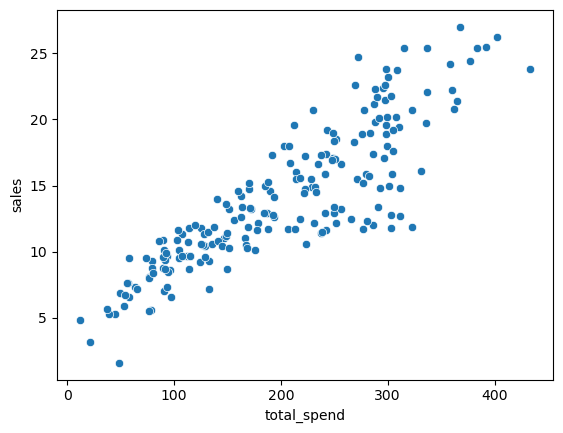

In [4]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

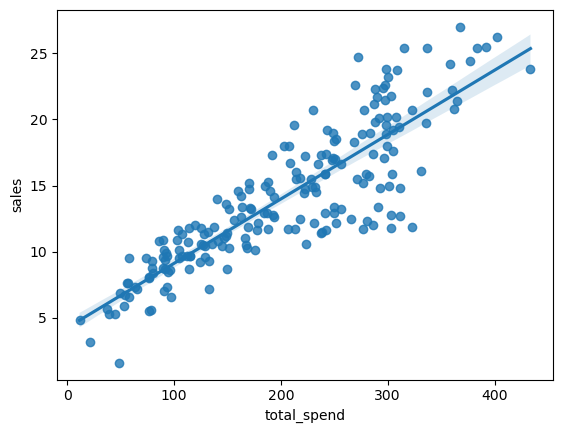

In [5]:
sns.regplot(data=df, x='total_spend', y='sales')

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
"""
We can create a best-fit line using an inbuilt numpy method called polyfit
to get a best-fit line which returns the equation y = B1x + B0
The function takes two arguments X and y, and returns an array with coefficient 
B1 and constant B0.
"""
advertisement_coeff = np.polyfit(X, y, deg=1)

In [8]:
np.polyfit(X, y, deg=1)[0]

0.04868787931904817

In [9]:
# We can create a plot of the regression line to get better understanding
# the regression line is generated. 
potential_spending = np.linspace(0, 500, 100)
predicted_sales = potential_spending * advertisement_coeff[0] + advertisement_coeff[1]

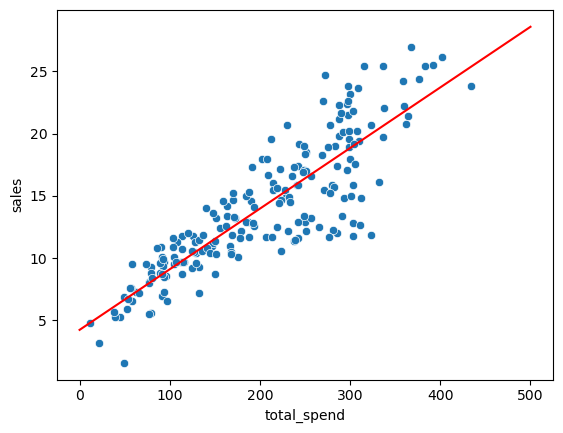

In [10]:
# Here the predicted sales line is plotted over the original data's regression line
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spending, predicted_sales, color = 'red')

In [11]:
""" 
Using the regression line equation we have just created we can predict the potential
sales based on the advertisement spending. Here is how we can achieve that. 
"""
spending = 200
predicted_sale = advertisement_coeff[0] * spending + advertisement_coeff[1]
predicted_sale

13.98060407984596

In [12]:
""" 
We can create a different regression line (models) for our predictions such
if we change our polynomial degree to different values. 
"""
adv_coef_three = np.polyfit(X, y, deg=3)
adv_coef_three

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [13]:
predicted_sales_three = (potential_spending**3 * adv_coef_three[0] + 
                        potential_spending**2 * adv_coef_three[1] +
                        potential_spending * adv_coef_three[2]+
                        adv_coef_three[3])
predicted_sales_three

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

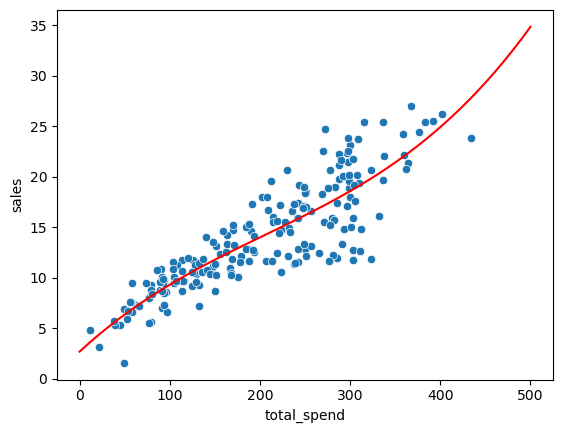

In [14]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spending, predicted_sales_three, color='red')

## Scikit-learn
* We have seen that we can deploy different models to analyze and predict the values for dependent variable, but it would be nice to know if we can create model for each independent variable such radio, tv and newspaper. To do that we can use library called scikit-learn. It allows us to create a different models and let us compare its effectiveness using it's built in functionality.
* Numpy has some built in capabilities for simpler linear regression, but when it comes to more complex models, we'll need scikit-learn.  
* Scikit-learn is a library containing many machine learning algorithms. It utilize a generalized "estimator API" framework to calling the models. This means the way algorithms are imported, fitted, and used is uniform across all algorithms. 
* This allows users to easily swap algorithms in and out and test various approaches. 
* scikit-learn also comes with many convenience tools, including train test split functions, cross validation tools, and a variety of reporting metric functions. This makes scikit-learn a one-stop-shop for machine learning.
* Scikit-learn's approach to model building focuses on applying models and performance metrics. 

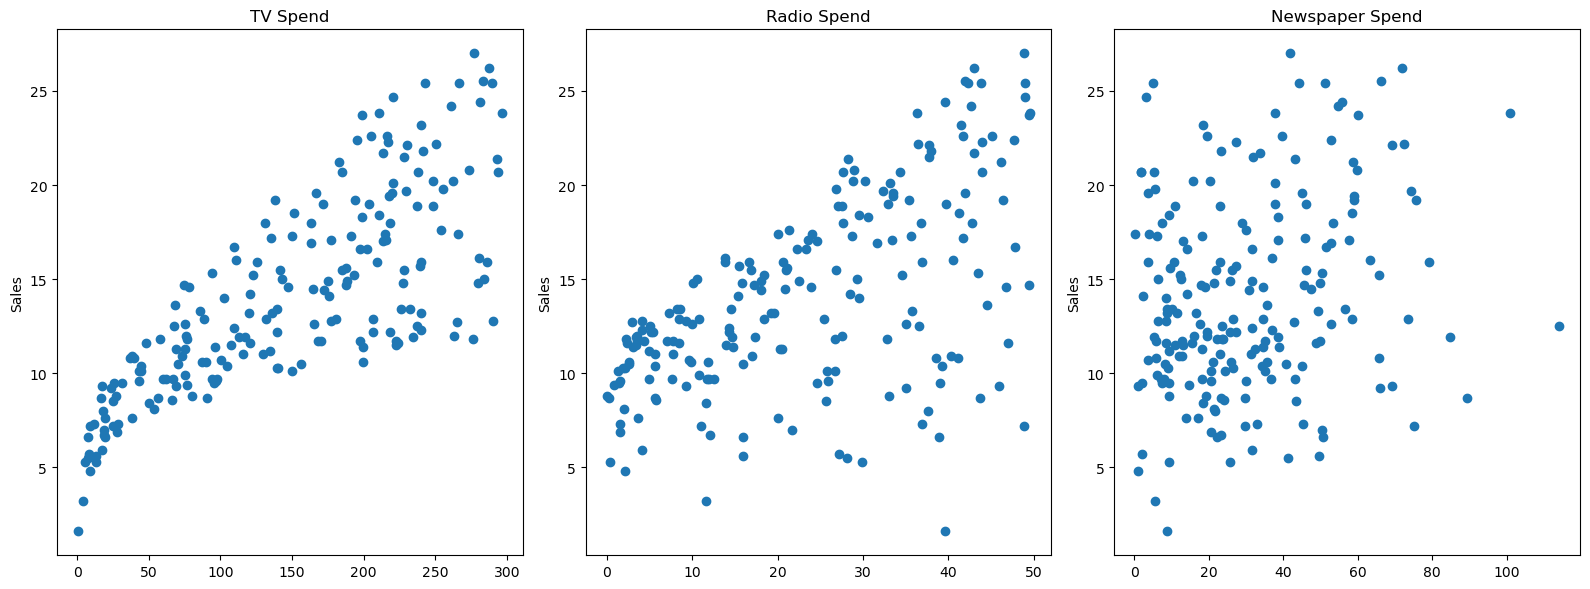

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")
plt.tight_layout()

In [16]:
X = df.drop(['sales', 'total_spend'], axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y = df['sales']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

### Evaluating Regression
* After predict/training the model it is always a good idea to verify how the model is behaving. And to do that, we can simply do evaluating regression. 
* Again, the regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)
    * For example, attempting to predict the price of a house given its features is a regression task. 
    * Attempting to predict the country a house is in given its features would be a classification task. 
* Here are a few popular regression models. 
    * Mean Absolute Error
    * Mean Squared Error
    * Root Mean Square Error

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
    * Since MAE is taking a absolute values and taking mean it will not be punished by large errors. 

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
    * To account for the large error, we can utilize the MSE. Since it is squared values of errors the effect of error is higher. 

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

    * When we try to answer a question that which model is perfect or how much error value is acceptable it depends on the context. To better understand the error we should try to compare error metrics with average value of the data set to try to get intuition of its overall performance.
     * Also it is necessary to consider the context of the problems such as if we are trying to create a model for automatic medication script, a small error in the RMSE can be vary significant. 

In [24]:
y_predicted = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
df.sales.mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

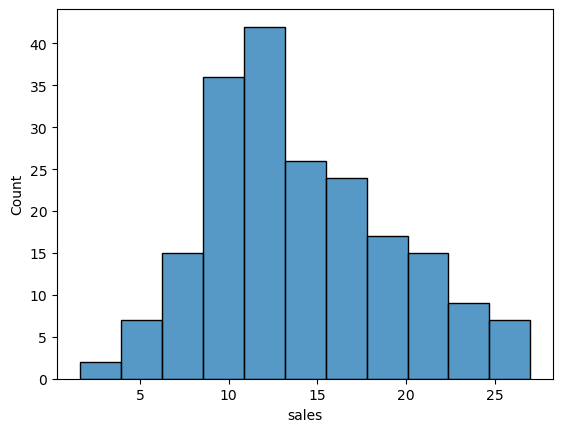

In [27]:
sns.histplot(data=df, x='sales')

In [28]:
mean_absolute_error(y_test, y_predicted)

1.2137457736144803

In [29]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_predicted))

1.516151937599388

In [30]:
test_residuals = y_test - y_predicted
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

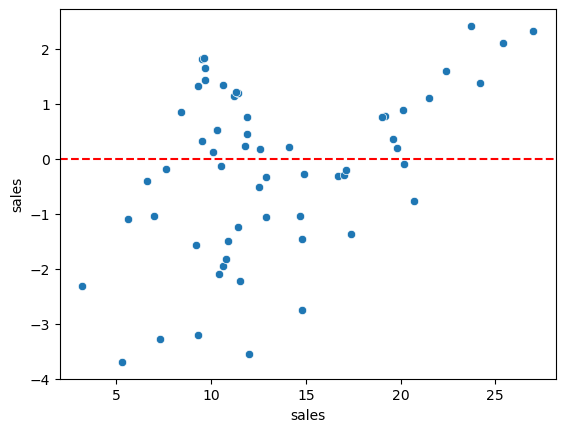

In [32]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls="--")

The residual values are randomly plotted, and there is no clear pattern that we can identify so it signifies that there is nothing funky going on behind the scene. Now we can verify that using the distribution plot as well. 

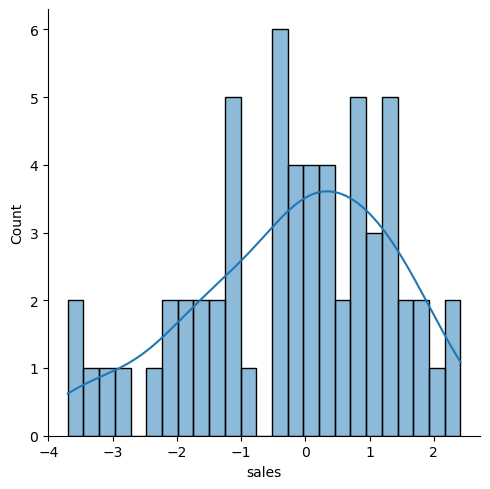

In [33]:
sns.displot(test_residuals, bins= 25, kde=True)

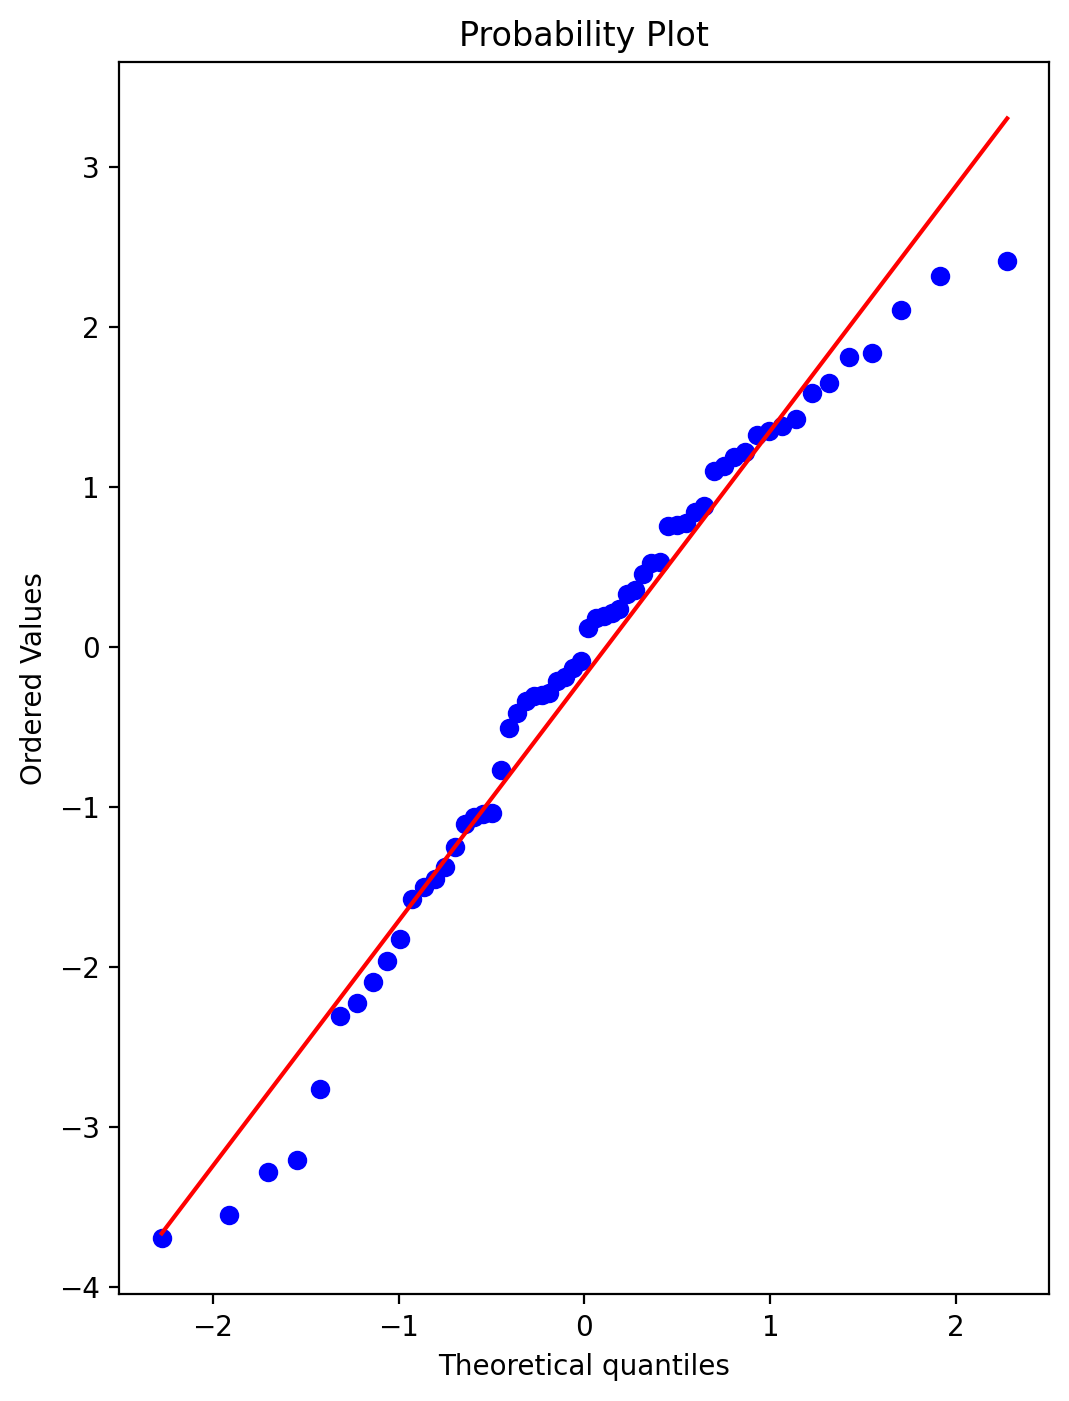

In [36]:
# We can also plot it against the actual value with our predicted values
# to see the effectiveness or errors in the model. 
import scipy as sp
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8), dpi=200)
# we can assign the value to plot to see the plot. 
_ = sp.stats.probplot(test_residuals,plot=ax)

Based on the above model development and the test we have performed using RMSE and MAE, and plotting the residual errors we can conclude that the linear regression model is correct model for our problem right now. Now we can deploy the model for our use. 

In [37]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

In [38]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [39]:
"""Now we will see that how our model is doing against our real data"""
y_dash = final_model.predict(X)

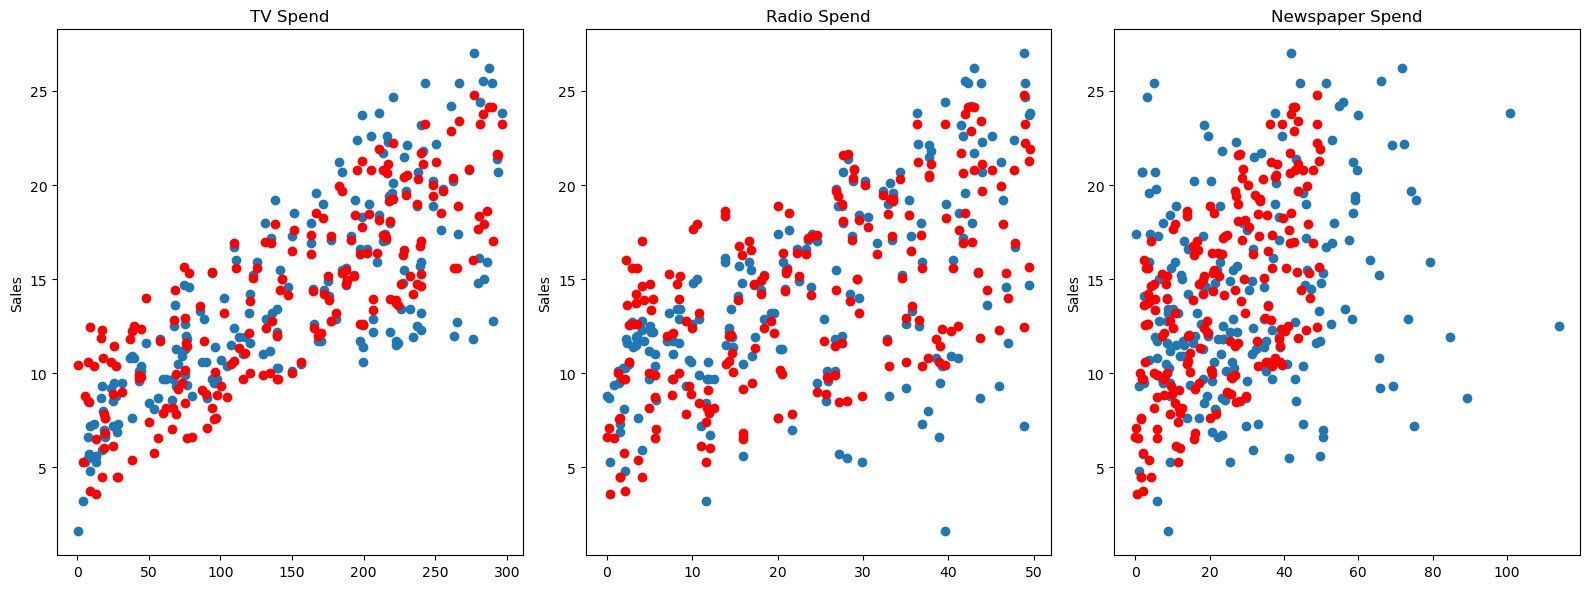

In [40]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'], y_dash,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'], y_dash,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'], y_dash,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [41]:
# Here is how we can save our model using joblib
from joblib import dump, load
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [42]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


So what does this coefficient mean? 
* If we hold all the other feature constant, a 1 unit increase in TV spend should increase our sales by 0.045 units. 
* Let's say if TV sales in thousands of dollars and sales are in millions. We can say spending $1000 we can expect to sale $4500 sale. 

* Same with the radio, if we increase spending by one unit we can expect to see the sale increase by the 0.188 unit. 

* According to our model we have negative corelation with the newspaper spending. That means by spending 1 unit of money on the newspaper, we expect to have our sales decrease by 0.001 unit. 

In [43]:
"""Now let's say if we want to run any ad campaign we can predict the effectiveness
of our campaign by our trained model."""
campaign = [[149, 22, 12]]

final_model.predict(campaign)

c:\Users\sawan\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

This is the conclusion of our machine learning model using linear regression. In the future I will add an link that will show how we can utilize optimization methods using libraries such as CPLEX, gurubi to get best possible spending combination to get optimum sales. For now, please explore next notebook called Polynomial Regression. 